In [2]:
%matplotlib Widget

import sampling
import modeling

import importlib
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


Text(0.5, 1.0, 'Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions')

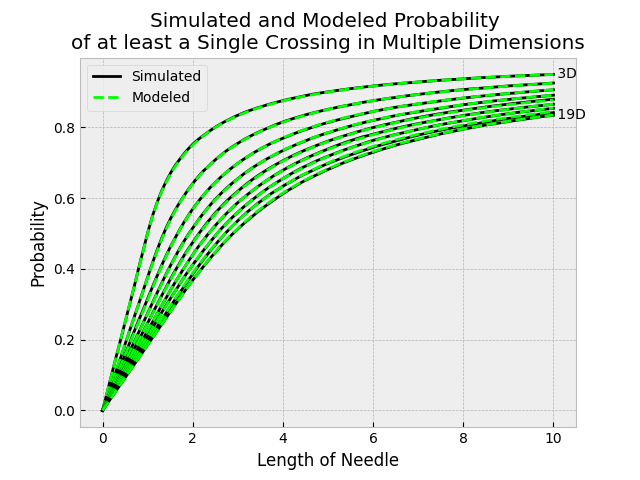

In [4]:
importlib.reload(sampling)

samples = 100000
dims = np.arange(3, 20, 2)
lengths = np.linspace(0, 10, 100)
hyperplanes = 1

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):

    xs = np.random.random((samples, dim))
    hypersphere = sampling.get_samples_gaussian(samples, dim)
    sim_probs = sampling.get_sim_prob_greater(samples, dim, lengths, 0, 1)

    ax.plot(lengths, sim_probs, "k")

    modeled_prob = modeling.prob_of_crossing(lengths, dim, N=hyperplanes)
    ax.plot(lengths, modeled_prob, "--", color=(0, 1, 0))

    if idx==0:
        ax.text(lengths[-1], modeled_prob[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
        
ax.text(lengths[-1], modeled_prob[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
ax.set_title("Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions")


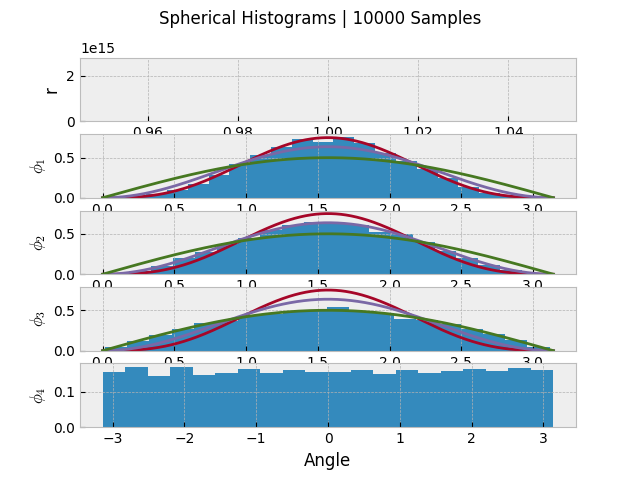

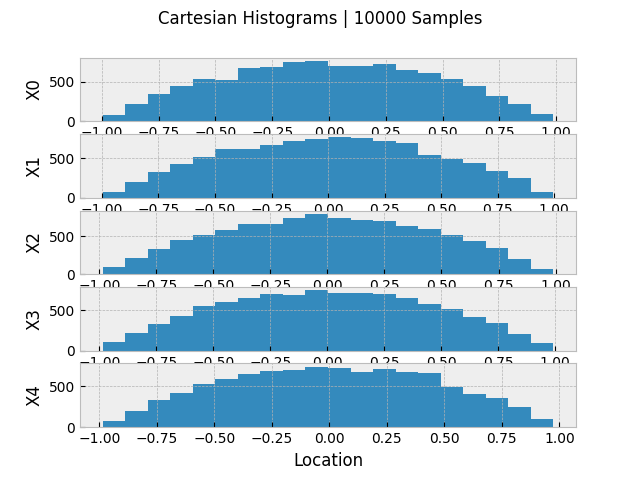

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)